In [ ]:
#This section is only verifying distribution of synthetic data and comparing it to the actual tested sample data

#NOT FINISHED

import sqlite3
import pandas as pd

try:
    database_path = "data/data.db"
    conn = sqlite3.connect(database_path)
    query = open('data/fetch_all.sql', 'r').read()
    df = pd.read_sql_query(query, conn)
except (sqlite3.Error, FileNotFoundError) as e:
    print(f"An error occurred: {e}")
finally:
    if 'conn' in locals():
        conn.close()

# Filter only rows with 'yes' or 'no' in the 'y' column
df = df[df['y'].isin(['no', 'yes'])]

# Drop specified columns
df = df.drop(columns=['client_id', 'account_id', 'campaign_id', 'outcome_id', 'previous', 'poutcome', 'month'])

# Binning day of the week into Early, Mid, and Late

bins = [0, 9, 19, 31]
labels = ['early', 'mid', 'late']
df['day_bin'] = pd.cut(df['day'], bins=bins, labels=labels, right=True)

# Binning age into common bins
age_bins = [0, 25, 35, 55, 65, 100]
age_labels = ['<25', '26-35', '36-55', '55-65', '65+']
df['age_bin'] = pd.cut(df['age'], bins=age_bins, labels=age_labels, right=False)

In [3]:

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

# Identify numerical and categorical columns
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns
categorical_columns = df.select_dtypes(include=['object']).columns

# Initialize OneHotEncoder
encoder = OneHotEncoder(sparse_output=False, drop='first')

# Fit and transform the categorical columns
encoded_features = encoder.fit_transform(df[categorical_columns])

# Create a DataFrame with the encoded features
encoded_df = pd.DataFrame(encoded_features, columns=encoder.get_feature_names_out(categorical_columns))

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the numerical columns
scaled_numeric_features = scaler.fit_transform(df[numerical_columns])

# Create a DataFrame with the scaled numerical features
scaled_numeric_df = pd.DataFrame(scaled_numeric_features, columns=numerical_columns)

# Concatenate the scaled numerical features and the encoded categorical features
df_enc = pd.concat([scaled_numeric_df, encoded_df], axis=1)

print(df_enc.head())

        age   balance       day  duration  campaign     pdays  \
0  0.078478 -0.472088 -1.323585  0.446598 -0.576829 -0.407218   
1  0.173040 -0.275697 -1.323585 -0.804230 -0.576829 -0.407218   
2  1.496912 -0.418920 -1.323585 -0.346234 -0.576829 -0.407218   
3  1.496912 -0.193951 -1.323585 -0.149950 -0.576829 -0.407218   
4  1.686036 -0.472753 -1.323585 -0.146102 -0.576829 -0.407218   

   job_blue-collar  job_entrepreneur  job_housemaid  job_management  ...  \
0              0.0               1.0            0.0             0.0  ...   
1              0.0               0.0            0.0             0.0  ...   
2              0.0               0.0            0.0             0.0  ...   
3              0.0               0.0            0.0             0.0  ...   
4              1.0               0.0            0.0             0.0  ...   

   marital_single  education_secondary  education_tertiary  education_unknown  \
0             0.0                  0.0                 1.0             

In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, GridSearchCV, KFold
from sklearn.linear_model import LogisticRegression, RidgeClassifierCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

# Assuming df_encoded_min_max_scaled is the dataframe to be split
X = df_enc.drop(columns=['y_yes'])
y = df_enc['y_yes']

# Apply SMOTE
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X, y)


           age   balance       day  duration  campaign     pdays  \
0     0.078478 -0.472088 -1.323585  0.446598 -0.576829 -0.407218   
1     0.173040 -0.275697 -1.323585 -0.804230 -0.576829 -0.407218   
2     1.496912 -0.418920 -1.323585 -0.346234 -0.576829 -0.407218   
3     1.496912 -0.193951 -1.323585 -0.149950 -0.576829 -0.407218   
4     1.686036 -0.472753 -1.323585 -0.146102 -0.576829 -0.407218   
...        ...       ...       ...       ...       ...       ...   
7995  1.306548 -0.100176  0.428122 -0.412053 -0.042236  0.118597   
7996 -1.179390  0.336053 -1.138847  0.369340 -0.086875 -0.407218   
7997 -1.669524 -0.308697  0.190366 -0.019668 -0.576829 -0.407218   
7998 -0.846746 -0.432623  0.374052  1.983071  0.066368 -0.256803   
7999 -0.387964  0.493352 -0.906193  0.465524 -0.462409 -0.407218   

      job_blue-collar  job_entrepreneur  job_housemaid  job_management  ...  \
0                 0.0               1.0            0.0        0.000000  ...   
1                 0.0    


Summary statistics for actual YES:
       job_blue-collar  job_entrepreneur  job_housemaid  job_management  \
count       521.000000        521.000000     521.000000      521.000000   
mean          0.132438          0.028791       0.026871        0.251440   
std           0.339292          0.167379       0.161863        0.434258   
min           0.000000          0.000000       0.000000        0.000000   
25%           0.000000          0.000000       0.000000        0.000000   
50%           0.000000          0.000000       0.000000        0.000000   
75%           0.000000          0.000000       0.000000        1.000000   
max           1.000000          1.000000       1.000000        1.000000   

       job_retired  job_self-employed  job_services  job_student  \
count   521.000000         521.000000    521.000000   521.000000   
mean      0.103647           0.038388      0.072937     0.036468   
std       0.305095           0.192315      0.260282     0.187633   
min       0.0000

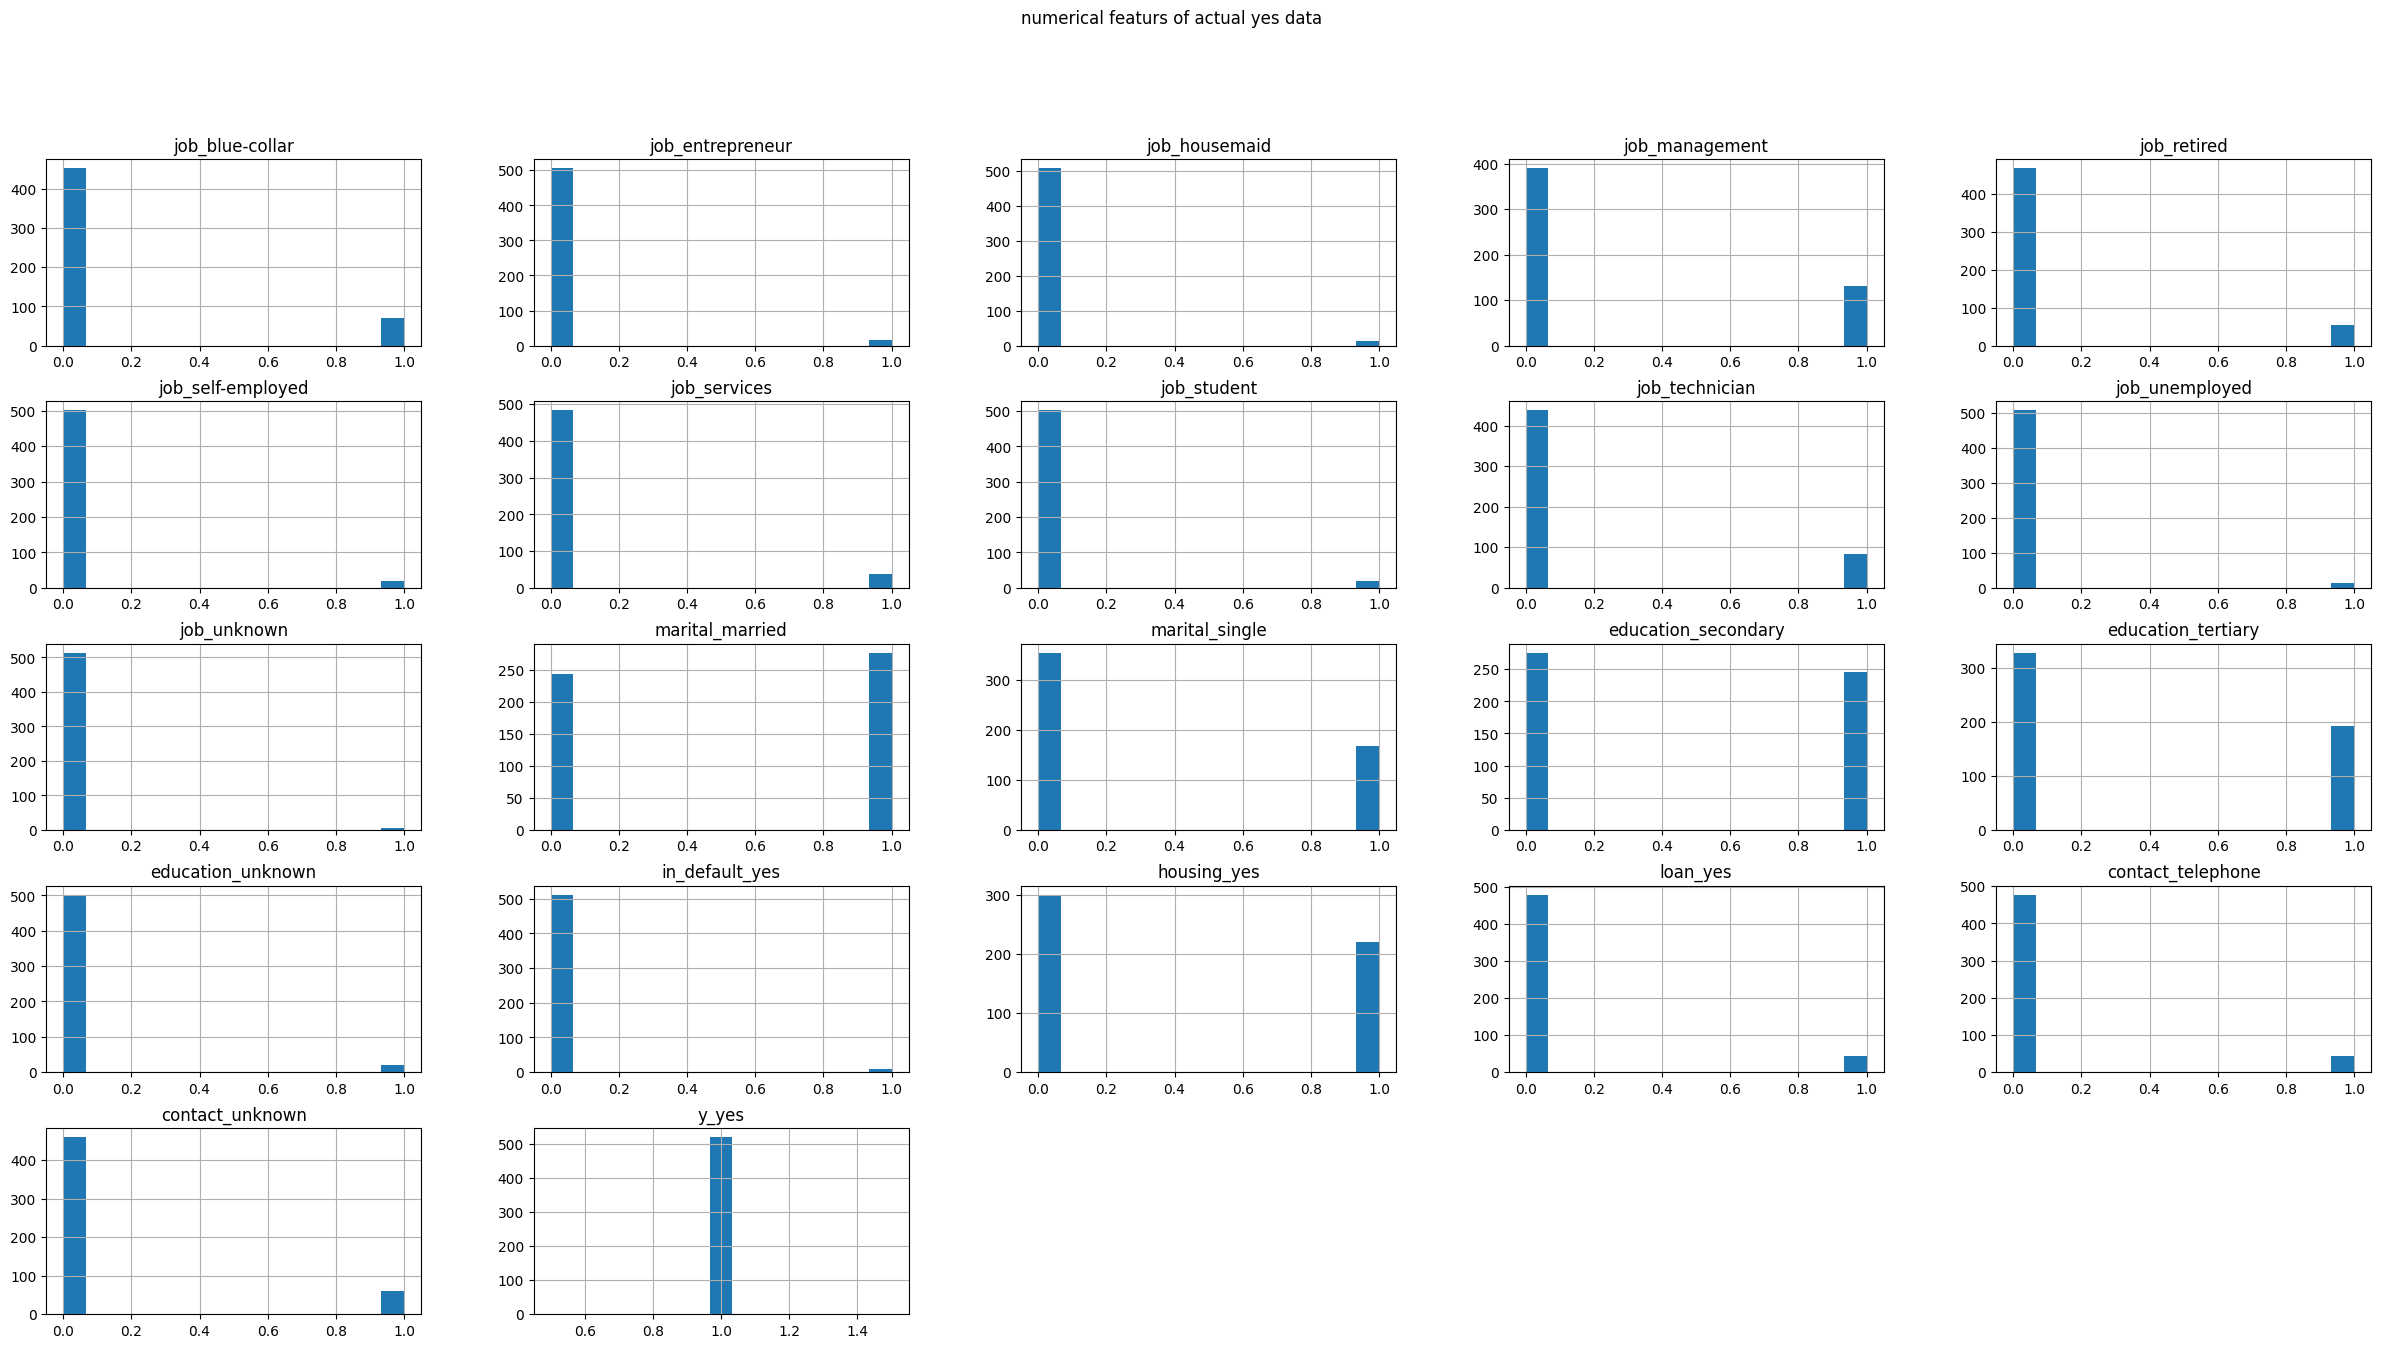

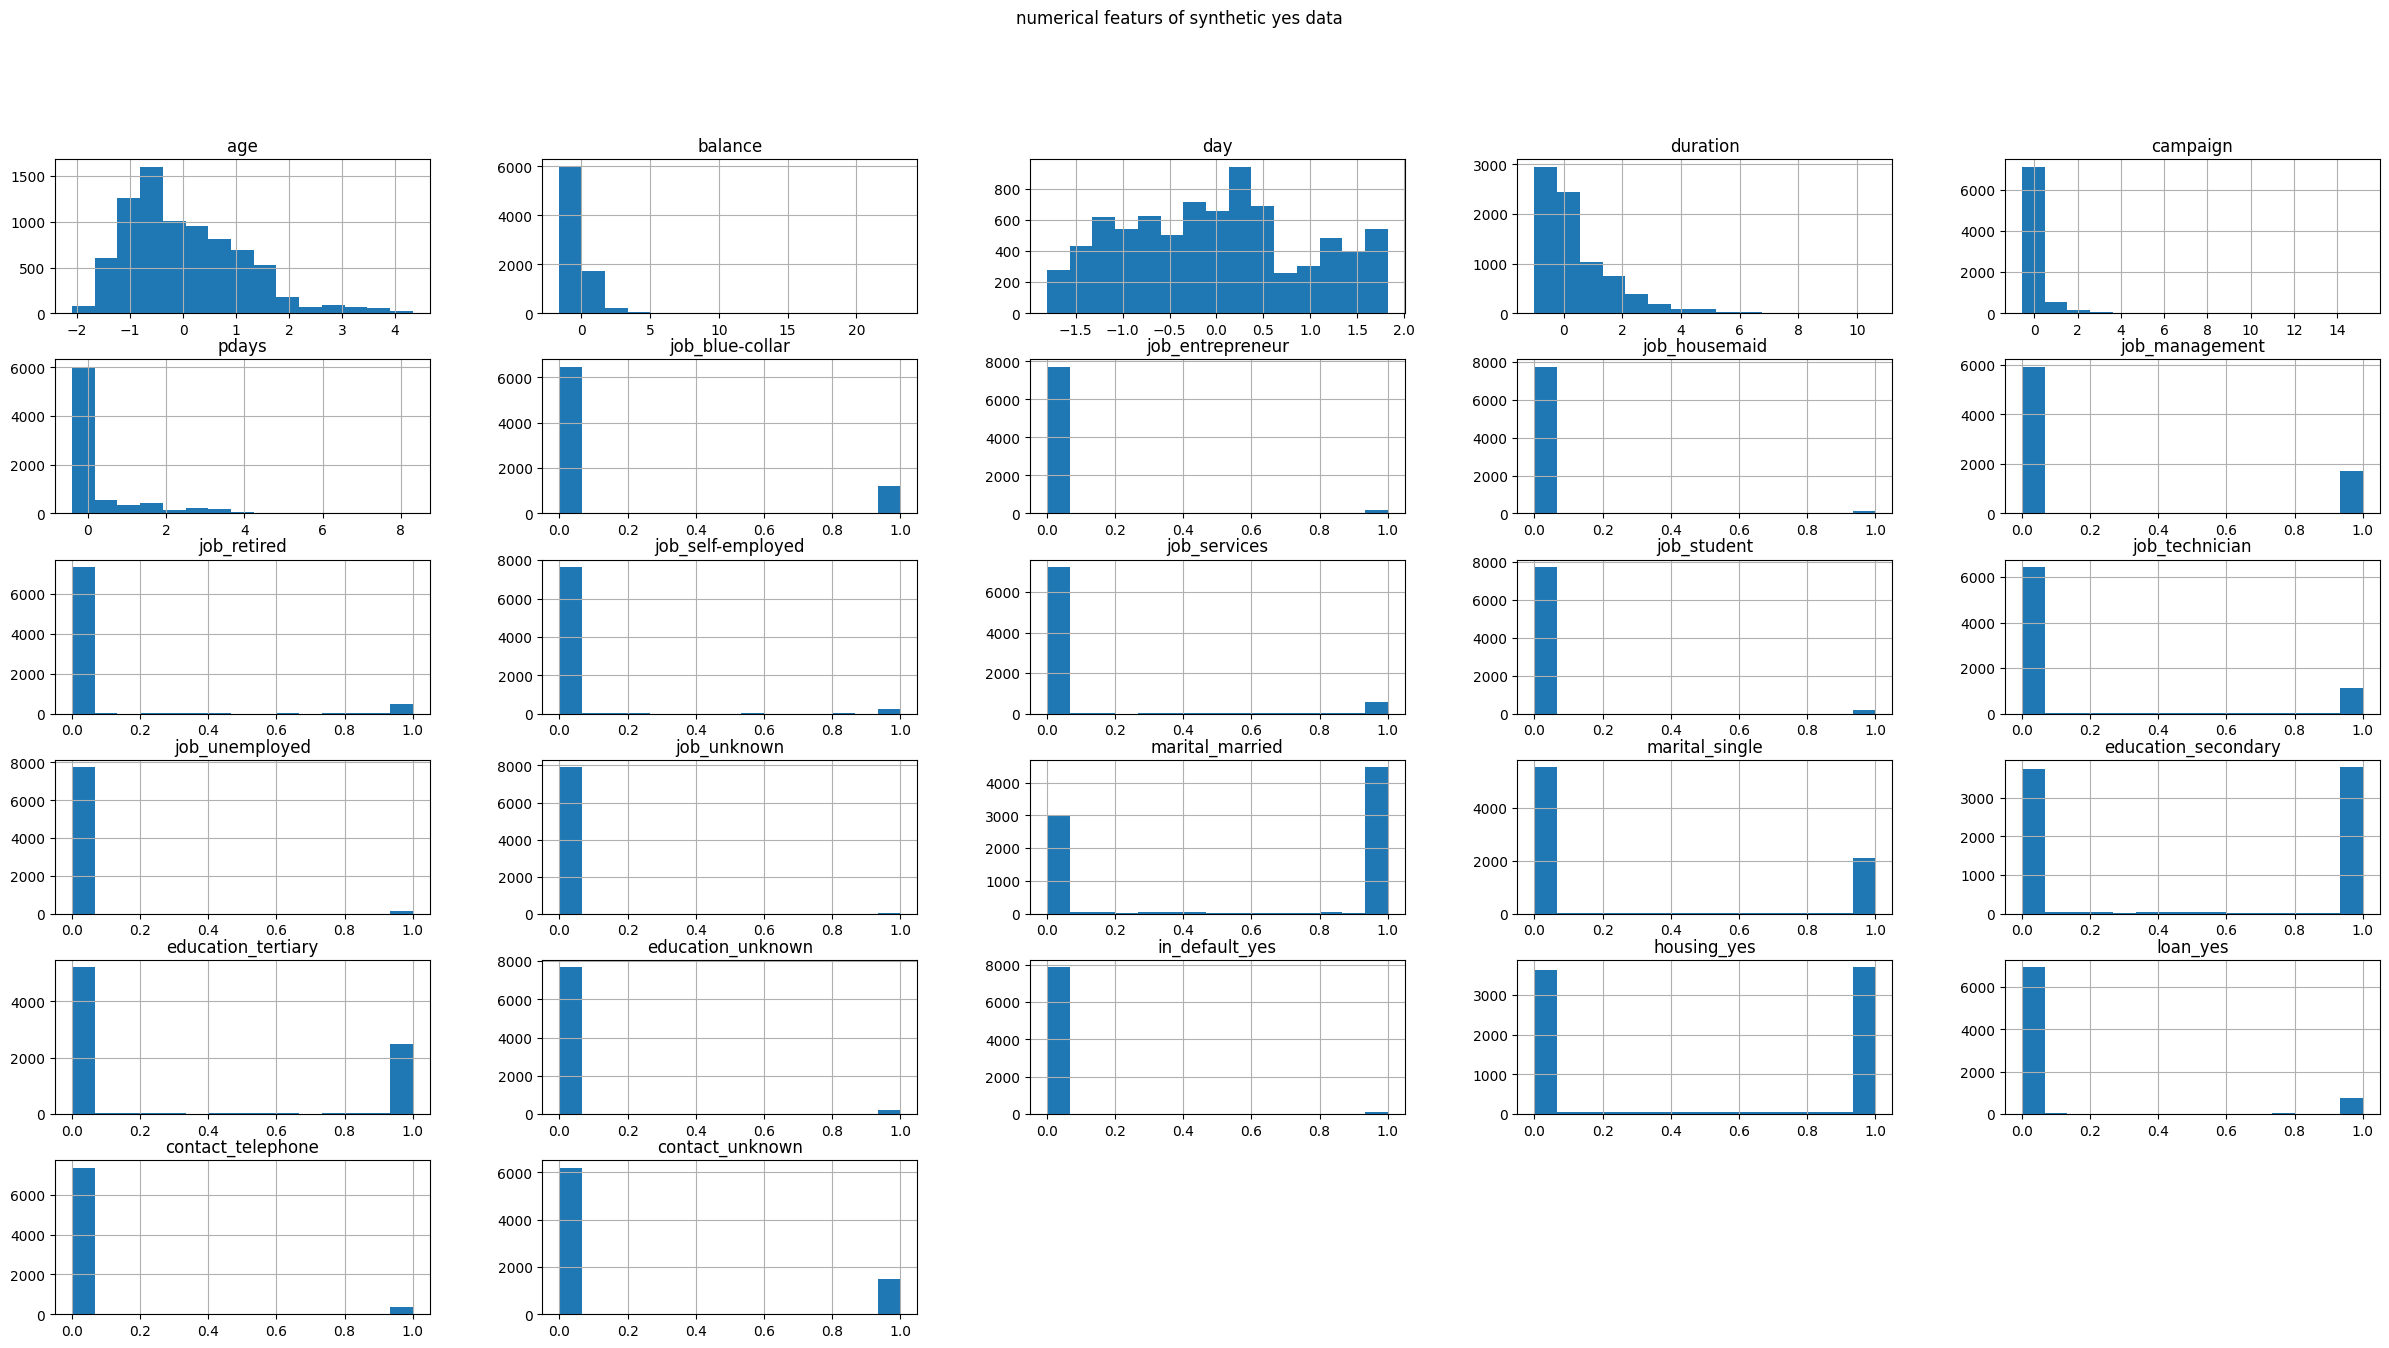

In [33]:
#importing libraries
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
import math
#defining data frames and plotting functions
def plot_numerical_features(data_source, chart_name):
    numerical_features = data_source.select_dtypes(include=['int64', 'float64']).columns
    data_source[numerical_features].hist(bins=15, figsize=(30, 15))
    plt.suptitle(chart_name)
    plt.show()


def plot_categorical_features(data_source, number_of_columns, data_selection_name):
    # Get categorical features
    categorical_features = data_source.select_dtypes(include=['object']).columns
    
    # Calculate the number of rows and columns for subplots
    n_features = len(categorical_features)
    n_cols = number_of_columns
    n_rows = math.ceil(n_features / n_cols)  # Calculate rows based on total features

    fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 4))
    axes = axes.flatten()  # Flatten the axes array for easy iteration
    
    # Plot each categorical feature
    for i, feature in enumerate(categorical_features):
        sns.countplot(data=data_source, x=feature, order=data_source[feature].value_counts().index, ax=axes[i])
        axes[i].set_title(f'Distribution of {feature} of {data_selection_name}')
        axes[i].tick_params(axis='x', rotation=90)
    
    # Remove unused subplots
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])
    
    # Adjust layout
    plt.tight_layout()
    plt.show()

## Correlation matrix table and heatmap
def correlation_matrix(data_source, matrix_name):
    numerical_features = data_source.select_dtypes(include=['int64', 'float64']).columns
    correlation_matrix = data_source[numerical_features].corr()
    plt.figure(figsize=(12, 8))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
    plt.title(f"Correlation Matrix of {matrix_name}")
    plt.show()
    print("Correlation Matrix Table:")
    print(correlation_matrix)


# Creatign DF for data for analysing the actual campaign results - filter only rows with 'yes' or 'no' in the 'y' column
df_actual_yes = encoded_df[encoded_df['y_yes'] == 1]


# Creating DF for the synthetic_data
df_synthetic_yes = X_res

# Summary statistics
print("\nSummary statistics for actual YES:")
print(df_actual_yes.describe(include='all'))


print("\nSummary statistics for synthetic YES:")
print(df_synthetic_yes.describe(include='all'))


plot_numerical_features(df_actual_yes, "numerical featurs of actual yes data")
plot_numerical_features(df_synthetic_yes,  "numerical featurs of synthetic yes data")